# Objective

The goal of this analysis is to cluster all songs by the Rolling Stones available on Spotify based on various audio and metadata features, creating well-defined song cohorts to enhance recommendation algorithms. By identifying groups of similar songs, Spotify can deliver tailored recommendations, improving user engagement and satisfaction.

In [ ]:
## Import Libraries and Dataset
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

1 - DATA INSPECTION AND CLEANING

In [ ]:
import pandas as pd
df = pd.read_csv('rolling_stones_spotify.csv')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [ ]:
#initial data inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [ ]:
#Dropping the variables that are not useful for our task
df = df.drop('Unnamed: 0',axis=1)
df.head(2)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233,0.961,-4.803,0.0759,131.455,0.3180,34,253173


In [ ]:
df.shape

(1610, 17)

In [ ]:
df.isnull().sum()

,0
name,0
album,0
release_date,0
track_number,0
id,0
uri,0
acousticness,0
danceability,0
energy,0
instrumentalness,0


In [ ]:
# Dropping Duplicates
df.drop_duplicates(inplace=True)
df.shape

(1610, 17)

2 - REFINE THE DATA FOR FURTHER PROCESSING BASED ON YOUR FINDINGS

<Axes: ylabel='duration_ms'>

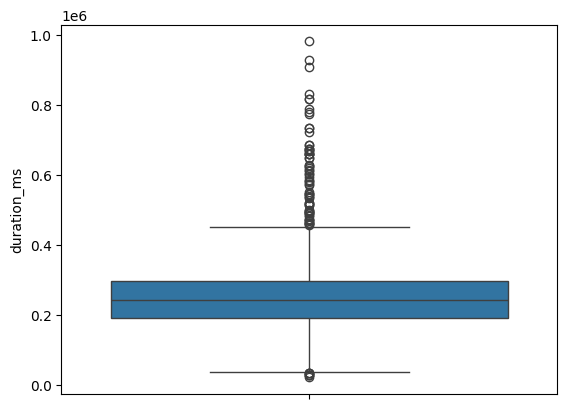

In [ ]:
# Visualize dataset to identify outliers
sns.boxplot(data=df['duration_ms'])

<Axes: ylabel='duration_ms'>

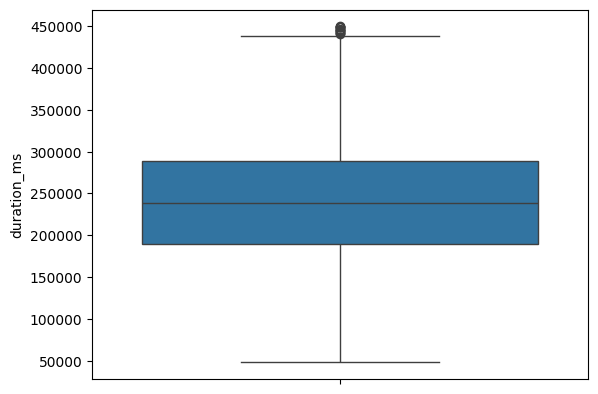

In [ ]:
df = df[(df['duration_ms']<450000)&(df['duration_ms']>40000)]
sns.boxplot(data=df['duration_ms'])

In [ ]:
# Select variable with Numerals
import numpy as np
df.select_dtypes(include=np.number).columns.tolist()

['track_number',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'duration_ms']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'track_number'),
  Text(1, 0, 'acousticness'),
  Text(2, 0, 'danceability'),
  Text(3, 0, 'energy'),
  Text(4, 0, 'instrumentalness'),
  Text(5, 0, 'liveness'),
  Text(6, 0, 'loudness'),
  Text(7, 0, 'speechiness'),
  Text(8, 0, 'tempo'),
  Text(9, 0, 'valence'),
  Text(10, 0, 'popularity')])

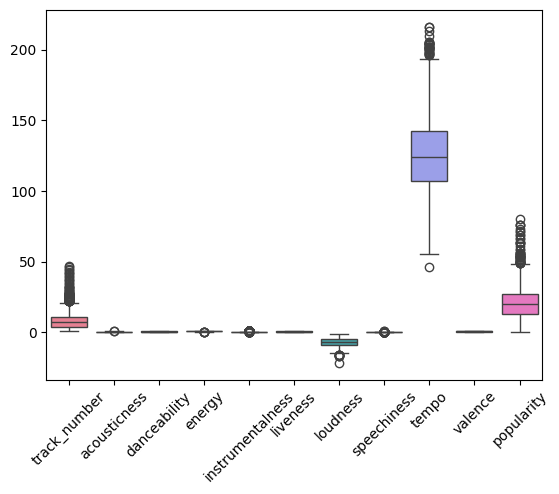

In [ ]:
# Visualize dataset to identify outliers
sns.boxplot(data=df[['track_number',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity']])
plt.xticks(rotation=45)

In [ ]:
# Determine outliers by using the interquartile range formular
subset_df = ['track_number',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'duration_ms']
#outlier_values = []
for i in subset_df :
  q1 = np.quantile(df[i],0.25)
  q3 = np.quantile(df[i],0.75)
  iqr = q3 - q1
  upper_range =  q3 + 1.5*iqr
  lower_range = q1 - 1.5*iqr
  df = df[(df[i]<upper_range) & (df[i]>lower_range)]

In [ ]:
df.shape

(1047, 17)

3 - PERFORM EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING

In [ ]:
# Number of songs in each album
song_counts = df.groupby('album').size().sort_values(ascending=False).reset_index(name='song_count')
print(song_counts)

                                                album  song_count
0                         Some Girls (Deluxe Version)          34
1                                          Live Licks          31
2                       Sticky Fingers (Super Deluxe)          26
3                                            Stripped          25
4                           Tattoo You (Super Deluxe)          23
..                                                ...         ...
83                                    Goats Head Soup           4
84                  Get Yer Ya-Ya's Out! (Remastered)           3
85                        Sticky Fingers (Remastered)           3
86                                         Some Girls           3
87  Live 1965: Music From Charlie Is My Darling (L...           2

[88 rows x 2 columns]


In [ ]:
#Ben=df.groupby(['album','name'])['popularity'].value_counts().sort_values(ascending=False)
#Ben.head(10)

#df.groupby('album')['name'].value_counts().sort_values(ascending=False)

# Top 3 albums with the most popular songs

# Define the popularity threshold
threshold = 0

# Filter songs based on the popularity threshold
popular_songs = df[df['popularity'] > threshold]

# Count the number of popular songs per album
popular_counts = popular_songs.groupby('album').size()

# Find the album with the highest count of popular songs
#most_popular_album = popular_counts.idxmax()
#highest_popular_count = popular_counts.max()
top_2_albums = popular_counts.nlargest(2).reset_index(name='song_count')
# Display the result
#print(f"The album with the most popular songs is '{most_popular_album}' with {highest_popular_count} songs.")

# Get the top 2 albums with the most popular songs


# Display the result
print("Top 2 albums with the most popular songs:")
print(top_2_albums)

Top 2 albums with the most popular songs:
                         album  song_count
0  Some Girls (Deluxe Version)          34
1                   Live Licks          31


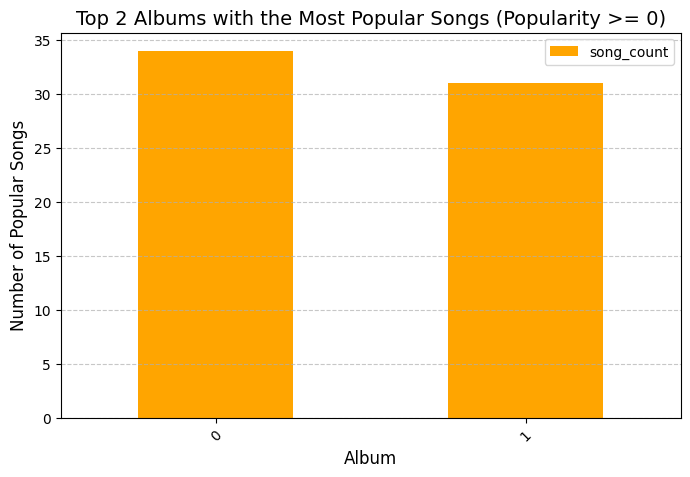

In [ ]:
# Plot the horizontal bar chart
top_3_albums.plot(kind='bar', color='orange', figsize=(8, 5))

# Add labels and title
plt.title('Top 2 Albums with the Most Popular Songs (Popularity >= 0)', fontsize=14)
plt.xlabel('Album', fontsize=12)
plt.ylabel('Number of Popular Songs', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [ ]:
# Identify the correlation between the variables
df[subset_df].corr(method='pearson')

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
track_number,1.000000,0.020382,-0.118739,0.044628,-0.026683,0.175906,0.032371,0.113989,-0.052445,-0.132557,-0.151608,0.141784
acousticness,0.020382,1.000000,0.090191,-0.408482,-0.066108,-0.093005,-0.240050,-0.154707,-0.151674,-0.165489,0.074691,0.103083
danceability,-0.118739,0.090191,1.000000,-0.283172,-0.039110,-0.493993,-0.285096,-0.286944,-0.248107,0.477778,0.095123,-0.228945
energy,0.044628,-0.408482,-0.283172,1.000000,0.103117,0.482198,0.699262,0.499874,0.177485,0.159731,-0.042779,0.153316
instrumentalness,-0.026683,-0.066108,-0.039110,0.103117,1.000000,0.013957,0.080366,-0.032292,0.067362,0.118256,0.038196,0.003583
liveness,0.175906,-0.093005,-0.493993,0.482198,0.013957,1.000000,0.348713,0.422585,0.068343,-0.282243,-0.174596,0.284502
loudness,0.032371,-0.240050,-0.285096,0.699262,0.080366,0.348713,1.000000,0.292220,0.050337,-0.048001,0.163896,0.281557
speechiness,0.113989,-0.154707,-0.286944,0.499874,-0.032292,0.422585,0.292220,1.000000,0.204006,-0.268683,-0.139703,0.125146
tempo,-0.052445,-0.151674,-0.248107,0.177485,0.067362,0.068343,0.050337,0.204006,1.000000,0.068283,-0.068193,-0.081804
valence,-0.132557,-0.165489,0.477778,0.159731,0.118256,-0.282243,-0.048001,-0.268683,0.068283,1.000000,0.011794,-0.278507


<Axes: >

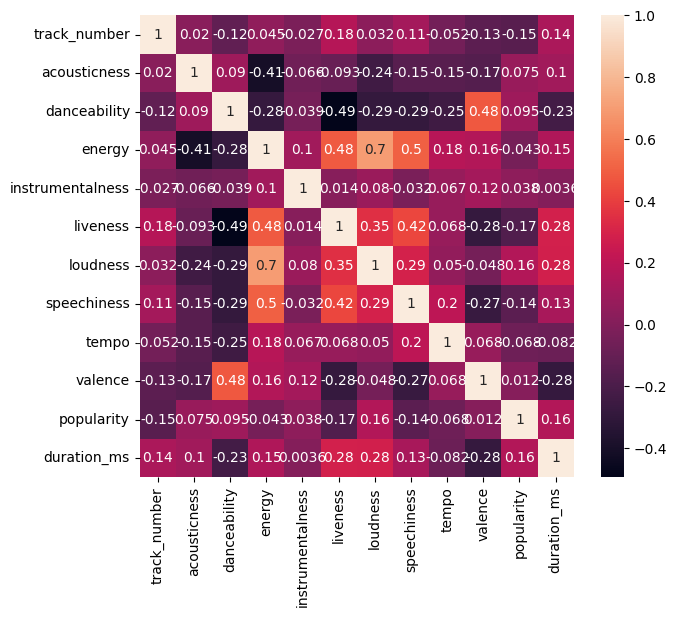

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(df[subset_df].corr(),annot=True)

Text(0, 0.5, 'popularity')

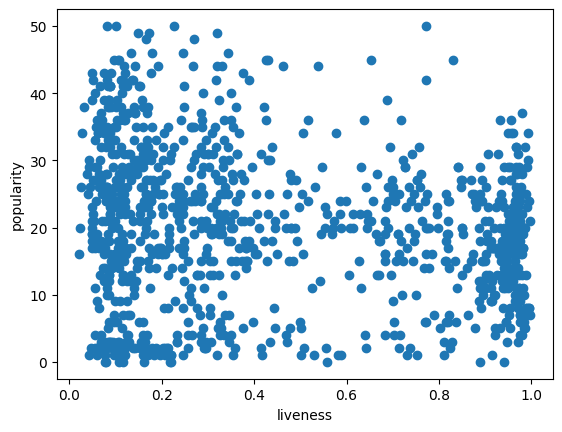

In [ ]:
plt.scatter(df['liveness'],df['popularity'])
plt.xlabel('liveness')
plt.ylabel('popularity')

Text(0, 0.5, 'loudness')

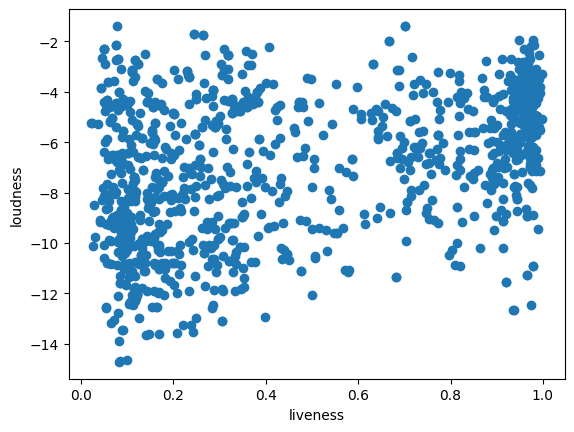

In [ ]:
plt.scatter(df['liveness'],df['loudness'])
plt.xlabel('liveness')
plt.ylabel('loudness')

In [ ]:
# Dimensionality reduction using principal component analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df[subset_df])
df_pca = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])

In [ ]:
df[subset_df].shape

(1047, 12)

In [ ]:
df_pca.head()

,PC 1,PC 2
0,9012.560704,8.436161
1,18999.560746,7.355550
2,60945.560659,9.186947
3,132.561588,-21.611162
4,1345.562328,-45.687515


Using PCA, i was able to reduce (compress) the number of features from 12 to 2 Features without losing much of the information. This process is like encrypting the data set. The final model we would create with this reduced features would enable the model perform faster and also be computation not expensive

4 - PERFORM CLUSTER ANALYSIS

In [ ]:
#importing Kmeans library from scikit-learn
from sklearn.cluster import KMeans

In [ ]:
sse = []
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_pca[['PC 1','PC 2']])
    sse.append(km.inertia_)

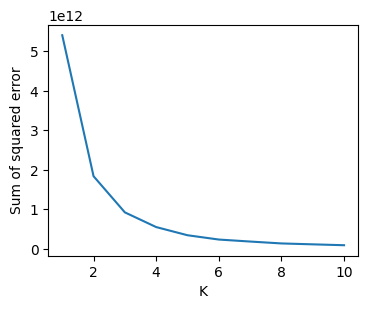

In [ ]:
plt.figure(figsize=(4,3))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
#calling the Kmeans library and we have decided tha number of clusters to be equal to 4
km = KMeans(n_clusters=4)
#train the model on two columns mean distance driven per day and overspeeding mean percent time
y_predicted = km.fit_predict(df_pca[['PC 1','PC 2']])
y_predicted

array([0, 3, 3, ..., 1, 1, 1], dtype=int32)

In [ ]:
#adding one more column named cluster which has the prediction
df_pca['cluster']=y_predicted
df_pca.sample(4)

,PC 1,PC 2,cluster
258,-4894.439378,-4.431796,0
712,157839.560621,2.331522,2
995,-68960.441032,52.588578,1
616,56265.560258,15.357665,3


In [ ]:
df_pca.head()
df_pca['cluster']=y_predicted
df_pca.sample(4)

,PC 1,PC 2,cluster
427,50999.561625,-27.084566,3
33,-102534.439898,24.701287,1
763,-31134.439257,5.287107,0
646,-80694.439009,-6.855128,1


In [ ]:
km.cluster_centers_

array([[-2.00581592e+04,  1.18163328e+00],
       [-8.60063696e+04,  4.25098603e-01],
       [ 1.34563168e+05, -4.14294330e-01],
       [ 4.52627390e+04, -1.39434472e+00]])

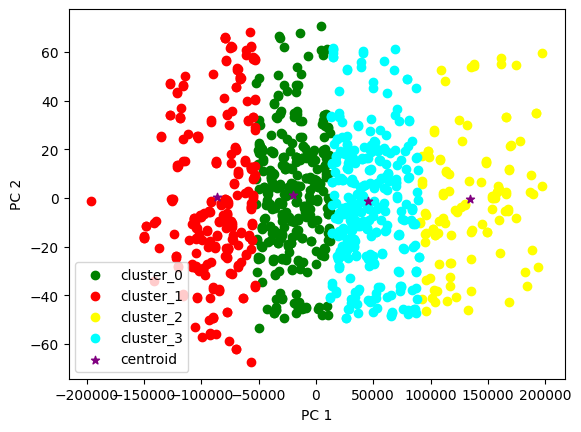

In [ ]:
df1 = df_pca[df_pca.cluster==0]
df2 = df_pca[df_pca.cluster==1]
df3 = df_pca[df_pca.cluster==2]
df4 = df_pca[df_pca.cluster==3]

plt.scatter(df1['PC 1'],df1['PC 2'],color='green',label='cluster_0')
plt.scatter(df2['PC 1'],df2['PC 2'],color='red',label='cluster_1')
plt.scatter(df3['PC 1'],df3['PC 2'],color='yellow',label='cluster_2')
plt.scatter(df4['PC 1'],df4['PC 2'],color='cyan',label='cluster_3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

**Methodology**

- Data Preparation

  The dataset includes features like acousticness, danceability, energy, instrumentalness, and more. Dimensionality reduction using Principal Component Analysis (PCA) was applied to condense the information into two primary components (PC 1 and PC 2) for visualizing song clusters.

- Clustering Model

  A k-means clustering algorithm was used to group songs. Four distinct clusters were identified and plotted based on PCA results, with centroids marked to represent the average characteristics of each cluster.



**Results**

- Cluster 0 (Green):

  Songs with high acousticness and instrumentalness, low energy, and moderate valence. Likely to include soft instrumental tracks or acoustic pieces. (**Ideal for users seeking relaxing or background music.**)

- Cluster 1 (Red):

  Tracks with high energy, danceability, and low speechiness. This cluster likely contains upbeat and dance-oriented songs. (**Suitable for party playlists or fitness enthusiasts.**)

- Cluster 2 (Yellow):

  High speechiness and liveness, moderate tempo, and lower valence. These are likely live performances or tracks with significant spoken word content. (**Best for live music fans.**)

- Cluster 3 (Cyan):

  Balanced features with moderate levels of energy, valence, and popularity. These could represent mainstream pop or general-purpose tracks. **(Best for general listeners)**


